# Declaration of Originality

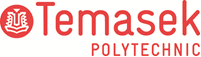

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [166]:
## Import libraries
import pandas as pd
import numpy as np


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [167]:
import numpy as np
import pandas as pd

# -----------------------------
# Load CSVs (Ergast uses "\N" for missing)
# Best practice: tell read_csv to treat "\N" as NaN
# In Python string literals, "\N" must be written as "\\N"
# -----------------------------
NA_MARKERS = ["\\N"]

results = pd.read_csv("archive/results.csv", na_values=NA_MARKERS)
races = pd.read_csv("archive/races.csv", na_values=NA_MARKERS)
drivers = pd.read_csv("archive/drivers.csv", na_values=NA_MARKERS)
constructors = pd.read_csv("archive/constructors.csv", na_values=NA_MARKERS)
circuits = pd.read_csv("archive/circuits.csv", na_values=NA_MARKERS)
qualifying = pd.read_csv("archive/qualifying.csv", na_values=NA_MARKERS)
status = pd.read_csv("archive/status.csv", na_values=NA_MARKERS)

# -----------------------------
# Keep only needed columns
# IMPORTANT: include statusId so we can filter DNFs later
# -----------------------------
results = results[["raceId","driverId","constructorId","grid","positionOrder","points","statusId"]]
races = races[["raceId","year","round","circuitId","name","date"]]
drivers = drivers[["driverId","dob","nationality"]]
constructors = constructors[["constructorId","nationality"]]
qualifying = qualifying[["raceId","driverId","constructorId","position","q1","q2","q3"]]
circuits = circuits[["circuitId","country","alt","lat","lng"]]
status = status[["statusId","status"]]

# -----------------------------
# Merge into one dataset (df)
# -----------------------------
df = (
    results.merge(races, on="raceId", how="left")
           .merge(drivers, on="driverId", how="left")
           .merge(constructors, on="constructorId", how="left", suffixes=("_driver", "_constructor"))
           .merge(qualifying, on=["raceId","driverId","constructorId"], how="left")
           .merge(circuits, on="circuitId", how="left")
           .merge(status, on="statusId", how="left")
)

# -----------------------------
# Finish flags
# -----------------------------
# Your strict rule: ONLY "Finished"
df["is_finished_only"] = (df["status"] == "Finished")



# Quick sanity check

print("Finished-only:", int(df["is_finished_only"].sum()), "/", len(df))

print("df shape:", df.shape)


Finished-only: 7674 / 26759
df shape: (26759, 25)


## 2.2 Summary Statistics

In [168]:
## Understand the type of variable for each column
df.shape


(26759, 25)

In [169]:
## Statistical summary (mean, max, min)
df.describe(include='all')

,raceId,driverId,constructorId,grid,positionOrder,points,statusId,year,round,circuitId,...,position,q1,q2,q3,country,alt,lat,lng,status,is_finished_only
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,...,10484.000000,10328,5847,3629,26759,26759.000000,26759.000000,26759.000000,26759,26759
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9136,5473,3470,35,NaN,NaN,NaN,137,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1:20.888,1:33.416,1:35.766,Italy,NaN,NaN,NaN,Finished,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4,3,3,2647,NaN,NaN,NaN,7674,19085
mean,551.687283,278.673530,50.180537,11.134796,12.794051,1.987632,17.224971,1991.394372,8.511192,23.820808,...,11.188668,NaN,NaN,NaN,NaN,276.847416,33.949556,5.724416,NaN,NaN
std,313.265036,282.703039,61.551498,7.202860,7.665951,4.351209,26.026104,19.952885,5.070231,19.112002,...,6.259034,NaN,NaN,NaN,NaN,409.086550,25.246080,57.632776,NaN,NaN
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1950.000000,1.000000,1.000000,...,1.000000,NaN,NaN,NaN,NaN,-7.000000,-37.849700,-118.189000,NaN,NaN
25%,300.000000,57.000000,6.000000,5.000000,6.000000,0.000000,1.000000,1977.000000,4.000000,9.000000,...,6.000000,NaN,NaN,NaN,NaN,18.000000,34.843100,-1.016940,NaN,NaN
50%,531.000000,172.000000,25.000000,11.000000,12.000000,0.000000,10.000000,1991.000000,8.000000,18.000000,...,11.000000,NaN,NaN,NaN,NaN,153.000000,43.734700,6.947500,NaN,NaN
75%,811.000000,399.500000,63.000000,17.000000,18.000000,2.000000,14.000000,2009.000000,12.000000,34.000000,...,16.000000,NaN,NaN,NaN,NaN,401.000000,49.254200,14.764700,NaN,NaN


In [170]:

df[["q1","q2","q3"]].isna().sum()

q1    16431
q2    20912
q3    23130
dtype: int64

In [171]:
df.describe(include='all')

,raceId,driverId,constructorId,grid,positionOrder,points,statusId,year,round,circuitId,...,position,q1,q2,q3,country,alt,lat,lng,status,is_finished_only
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,...,10484.000000,10328,5847,3629,26759,26759.000000,26759.000000,26759.000000,26759,26759
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9136,5473,3470,35,NaN,NaN,NaN,137,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1:20.888,1:33.416,1:35.766,Italy,NaN,NaN,NaN,Finished,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4,3,3,2647,NaN,NaN,NaN,7674,19085
mean,551.687283,278.673530,50.180537,11.134796,12.794051,1.987632,17.224971,1991.394372,8.511192,23.820808,...,11.188668,NaN,NaN,NaN,NaN,276.847416,33.949556,5.724416,NaN,NaN
std,313.265036,282.703039,61.551498,7.202860,7.665951,4.351209,26.026104,19.952885,5.070231,19.112002,...,6.259034,NaN,NaN,NaN,NaN,409.086550,25.246080,57.632776,NaN,NaN
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1950.000000,1.000000,1.000000,...,1.000000,NaN,NaN,NaN,NaN,-7.000000,-37.849700,-118.189000,NaN,NaN
25%,300.000000,57.000000,6.000000,5.000000,6.000000,0.000000,1.000000,1977.000000,4.000000,9.000000,...,6.000000,NaN,NaN,NaN,NaN,18.000000,34.843100,-1.016940,NaN,NaN
50%,531.000000,172.000000,25.000000,11.000000,12.000000,0.000000,10.000000,1991.000000,8.000000,18.000000,...,11.000000,NaN,NaN,NaN,NaN,153.000000,43.734700,6.947500,NaN,NaN
75%,811.000000,399.500000,63.000000,17.000000,18.000000,2.000000,14.000000,2009.000000,12.000000,34.000000,...,16.000000,NaN,NaN,NaN,NaN,401.000000,49.254200,14.764700,NaN,NaN


In [172]:
## Check for missing values
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   26759 non-null  int64  
 1   driverId                 26759 non-null  int64  
 2   constructorId            26759 non-null  int64  
 3   grid                     26759 non-null  int64  
 4   positionOrder            26759 non-null  int64  
 5   points                   26759 non-null  float64
 6   statusId                 26759 non-null  int64  
 7   year                     26759 non-null  int64  
 8   round                    26759 non-null  int64  
 9   circuitId                26759 non-null  int64  
 10  name                     26759 non-null  object 
 11  date                     26759 non-null  object 
 12  dob                      26759 non-null  object 
 13  nationality_driver       26759 non-null  object 
 14  nationality_constructo

In [173]:
# 1) Convert date columns to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")

# 2) Driver age at race (years)
df["driver_age"] = (df["date"] - df["dob"]).dt.days / 365.25

# 3) Convert qualifying position to numeric
df["quali_position"] = pd.to_numeric(df["position"], errors="coerce")

# 4) Convert q1/q2/q3 strings like '1:26.572' into seconds
def time_to_seconds(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == "" or s.lower() == "nan" or s in ["\\N", r"\N"]:

        return np.nan
    parts = s.split(":")
    try:
        if len(parts) == 2:  # M:SS.mmm
            return int(parts[0]) * 60 + float(parts[1])
        elif len(parts) == 3:  # H:MM:SS.mmm (rare)
            return int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
        else:
            return float(s)
    except:
        return np.nan

df["q1_sec"] = df["q1"].apply(time_to_seconds)
df["q2_sec"] = df["q2"].apply(time_to_seconds)
df["q3_sec"] = df["q3"].apply(time_to_seconds)

# 5) Best available qualifying time + flag
df["quali_best_sec"] = df[["q1_sec", "q2_sec", "q3_sec"]].min(axis=1)
df["has_quali"] = (~df["quali_best_sec"].isna()).astype(int)

# Quick check
df[["driver_age", "quali_position", "quali_best_sec", "has_quali"]].isna().sum()

driver_age            0
quali_position    16275
quali_best_sec    16431
has_quali             0
dtype: int64

In [174]:
## Describe data distribution


print("Total columns:", len(df.columns))
print(df.columns.tolist())


Total columns: 32
['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points', 'statusId', 'year', 'round', 'circuitId', 'name', 'date', 'dob', 'nationality_driver', 'nationality_constructor', 'position', 'q1', 'q2', 'q3', 'country', 'alt', 'lat', 'lng', 'status', 'is_finished_only', 'driver_age', 'quali_position', 'q1_sec', 'q2_sec', 'q3_sec', 'quali_best_sec', 'has_quali']


In [175]:
engineered = [c for c in df.columns if c.endswith("_sec")] + [
    "quali_best_sec", "has_quali", "quali_position",
    "driver_age",
    "driver_races_before","constructor_races_before",
    "driver_last_finish","driver_avg_finish_last5","driver_avg_points_last5",
    "constructor_avg_finish_last5","constructor_avg_points_last5",
    "driver_season_points_to_date","constructor_season_points_to_date"
]
engineered = [c for c in engineered if c in df.columns]  # keep only existing

print("Engineered features currently present:")
print(engineered)


Engineered features currently present:
['q1_sec', 'q2_sec', 'q3_sec', 'quali_best_sec', 'quali_best_sec', 'has_quali', 'quali_position', 'driver_age']


In [176]:
################################################################
#### 📈 FEATURE ENGINEERING (PAST PERFORMANCE, NO LEAKAGE) 📈
################################################################


# Sort chronologically (important for "last 5 races")
df = df.sort_values(["date", "round", "raceId", "driverId"]).reset_index(drop=True)

# Experience: races completed before this one
df["driver_races_before"] = df.groupby("driverId").cumcount()
df["constructor_races_before"] = df.groupby("constructorId").cumcount()

# Driver last finish + rolling averages (shift(1) avoids using current race result)
df["driver_last_finish"] = df.groupby("driverId")["positionOrder"].shift(1)

df["driver_avg_finish_last5"] = df.groupby("driverId")["positionOrder"].transform(
    lambda s: s.shift(1).rolling(5, min_periods=1).mean()
)

df["driver_avg_points_last5"] = df.groupby("driverId")["points"].transform(
    lambda s: s.shift(1).rolling(5, min_periods=1).mean()
)

# Constructor rolling averages (also shifted)
df["constructor_avg_finish_last5"] = df.groupby("constructorId")["positionOrder"].transform(
    lambda s: s.shift(1).rolling(5, min_periods=1).mean()
)

df["constructor_avg_points_last5"] = df.groupby("constructorId")["points"].transform(
    lambda s: s.shift(1).rolling(5, min_periods=1).mean()
)

# Season points to date (shifted)
df["driver_season_points_to_date"] = df.groupby(["driverId", "year"])["points"].transform(
    lambda s: s.shift(1).fillna(0).cumsum()
)

df["constructor_season_points_to_date"] = df.groupby(["constructorId", "year"])["points"].transform(
    lambda s: s.shift(1).fillna(0).cumsum()
)

# Quick check (new drivers will have NaNs in last_finish)
df[[
    "driver_last_finish",
    "driver_avg_finish_last5",
    "driver_avg_points_last5",
    "constructor_avg_finish_last5",
    "constructor_avg_points_last5"
]].isna().sum()


driver_last_finish              861
driver_avg_finish_last5         861
driver_avg_points_last5         861
constructor_avg_finish_last5    211
constructor_avg_points_last5    211
dtype: int64

In [177]:
################################################################
#### 🧼 HANDLE MISSING VALUES (IMPUTATION) 🧼
################################################################

# For "no history yet" (first race), fill with overall medians
history_cols = [
    "driver_last_finish",
    "driver_avg_finish_last5",
    "driver_avg_points_last5",
    "constructor_avg_finish_last5",
    "constructor_avg_points_last5",
]

for c in history_cols:
    df[c] = df[c].fillna(df[c].median())

# Qualifying missing: keep has_quali flag and fill numeric with medians
df["quali_best_sec"] = df["quali_best_sec"].fillna(df["quali_best_sec"].median())
df["quali_position"] = df["quali_position"].fillna(df["quali_position"].median())

# Driver age (should already be fine, but safe)
df["driver_age"] = df["driver_age"].fillna(df["driver_age"].median())

# Circuit numeric (safe)
df["alt"] = df["alt"].fillna(df["alt"].median())
df["lat"] = df["lat"].fillna(df["lat"].median())
df["lng"] = df["lng"].fillna(df["lng"].median())

# Country missing (rare)
df["country"] = df["country"].fillna("Unknown")

# Check remaining missing
df.isna().sum().sort_values(ascending=False).head(15)


q3                          23130
q3_sec                      23130
q2                          20912
q2_sec                      20912
q1                          16431
q1_sec                      16431
position                    16275
raceId                          0
status                          0
driver_age                      0
quali_position                  0
quali_best_sec                  0
has_quali                       0
driver_races_before             0
constructor_races_before        0
dtype: int64

In [178]:
feature_cols = [
    "year","round","circuitId","alt","lat","lng",
    "grid","has_quali","quali_position","quali_best_sec",
    "driver_age",
    "driver_races_before","constructor_races_before",
    "driver_last_finish","driver_avg_finish_last5","driver_avg_points_last5",
    "constructor_avg_finish_last5","constructor_avg_points_last5",
    "driver_season_points_to_date","constructor_season_points_to_date",
    "driverId","constructorId","country"
]

df[feature_cols].isna().sum().sort_values(ascending=False).head(20)


year                                 0
constructor_races_before             0
constructorId                        0
driverId                             0
constructor_season_points_to_date    0
driver_season_points_to_date         0
constructor_avg_points_last5         0
constructor_avg_finish_last5         0
driver_avg_points_last5              0
driver_avg_finish_last5              0
driver_last_finish                   0
driver_races_before                  0
round                                0
driver_age                           0
quali_best_sec                       0
quali_position                       0
has_quali                            0
grid                                 0
lng                                  0
lat                                  0
dtype: int64

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [179]:
## Understanding distribution of target
# Find correlation
df.corr(numeric_only=True)

,raceId,driverId,constructorId,grid,positionOrder,points,statusId,year,round,circuitId,...,has_quali,driver_races_before,constructor_races_before,driver_last_finish,driver_avg_finish_last5,driver_avg_points_last5,constructor_avg_finish_last5,constructor_avg_points_last5,driver_season_points_to_date,constructor_season_points_to_date
raceId,1.000000,0.753768,0.439926,-0.033888,-0.076786,0.242543,-0.018386,0.091595,0.057888,0.262548,...,0.189844,0.110378,0.106019,-0.084559,-0.117020,0.299272,-0.113447,0.305032,0.274777,0.299542
driverId,0.753768,1.000000,0.322572,0.051541,-0.015473,0.052361,-0.006415,0.064487,0.016931,0.181952,...,0.182918,-0.187598,0.039708,-0.026040,-0.032893,0.062472,-0.045614,0.088519,0.068349,0.106495
constructorId,0.439926,0.322572,1.000000,0.103062,0.080735,-0.049738,0.092891,-0.166254,-0.072824,0.136388,...,-0.030315,-0.071161,-0.404521,0.063324,0.086229,-0.057765,0.106387,-0.060775,-0.051629,-0.040867
grid,-0.033888,0.051541,0.103062,1.000000,0.165097,-0.375658,-0.114547,-0.016940,0.007228,-0.002405,...,-0.021722,-0.193646,-0.184964,0.232482,0.307779,-0.380246,0.287785,-0.360641,-0.293047,-0.289311
positionOrder,-0.076786,-0.015473,0.080735,0.165097,1.000000,-0.576483,0.524902,-0.107401,-0.020986,-0.004430,...,-0.166730,-0.233946,-0.224886,0.381968,0.499577,-0.368623,0.499484,-0.354823,-0.294351,-0.294169
points,0.242543,0.052361,-0.049738,-0.375658,-0.576483,1.000000,-0.269385,0.288615,0.095933,0.000116,...,0.294006,0.341045,0.315056,-0.312137,-0.418844,0.709379,-0.405900,0.679851,0.613166,0.597379
statusId,-0.018386,-0.006415,0.092891,-0.114547,0.524902,-0.269385,1.000000,-0.219814,-0.087713,0.037421,...,-0.245471,-0.185445,-0.180333,0.258923,0.342202,-0.199300,0.343385,-0.193420,-0.168594,-0.164348
year,0.091595,0.064487,-0.166254,-0.016940,-0.107401,0.288615,-0.219814,1.000000,0.337228,-0.176449,...,0.791274,0.474239,0.443349,-0.086124,-0.123577,0.350013,-0.141005,0.359884,0.355319,0.335344
round,0.057888,0.016931,-0.072824,0.007228,-0.020986,0.095933,-0.087713,0.337228,1.000000,0.129265,...,0.210520,0.212771,0.163953,-0.013956,-0.023606,0.116808,-0.024399,0.119604,0.395088,0.403891
circuitId,0.262548,0.181952,0.136388,-0.002405,-0.004430,0.000116,0.037421,-0.176449,0.129265,1.000000,...,-0.165976,-0.045220,-0.061270,-0.003238,-0.004426,0.000830,0.004223,-0.002805,0.063636,0.074650


### 2.3.1.2 Understanding distribution of features

In [180]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [181]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [182]:
## Clean data

## 3.2 Train-Test Split

In [183]:
# Use modern era (qualifying data is reliable)
df_model = df[df["year"] >= 2006].copy()
df_model["date"] = pd.to_datetime(df_model["date"], errors="coerce")



In [186]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# ----------------------------
# 1) Choose dataset + split
# ----------------------------
df_model = df[df["year"] >= 2006].copy()
df_model["date"] = pd.to_datetime(df_model["date"], errors="coerce")

cutoff = df_model["date"].quantile(0.8)
train_idx = df_model["date"] <= cutoff
test_idx  = df_model["date"] > cutoff

print("Train rows:", int(train_idx.sum()), "| Test rows:", int(test_idx.sum()))
print("Cutoff date:", cutoff.date())

# ----------------------------
# 2) Features + target
# ----------------------------
feature_cols = [
    "year","round","circuitId","alt","lat","lng",
    "grid","has_quali","quali_position","quali_best_sec",
    "driver_age",
    "driver_races_before","constructor_races_before",
    "driver_last_finish","driver_avg_finish_last5","driver_avg_points_last5",
    "constructor_avg_finish_last5","constructor_avg_points_last5",
    "driver_season_points_to_date","constructor_season_points_to_date",
    "driverId","constructorId","country"
]
target = "positionOrder"

X_raw = df_model[feature_cols].copy()
y = df_model[target].astype(float).copy()

# One-hot encode categorical columns (consistent with your approach)
X = pd.get_dummies(
    X_raw,
    columns=["driverId","constructorId","circuitId","country"],
    drop_first=True
)

# Fill remaining NaNs safely (median per column)
for c in X.columns:
    if pd.api.types.is_numeric_dtype(X[c]):
        X[c] = X[c].fillna(X[c].median())

# Train/test matrices
X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

# Keep columns for later prediction functions
X_columns = X.columns

# Baseline values for test
grid_test = df_model.loc[test_idx, "grid"].astype(float).values

# ----------------------------
# 3) Models (5 + baseline)
# ----------------------------
hgb = HistGradientBoostingRegressor(loss="absolute_error", random_state=2025)
gbr = GradientBoostingRegressor(random_state=2025)

rf  = RandomForestRegressor(
    n_estimators=400,
    random_state=2025,
    n_jobs=-1,
    min_samples_leaf=2
)

dt  = DecisionTreeRegressor(
    random_state=2025,
    max_depth=12,
    min_samples_leaf=5
)

lin = LinearRegression()

models = {
    "HistGradientBoosting(abs_error)": hgb,
    "GradientBoostingRegressor": gbr,
    "RandomForestRegressor": rf,
    "DecisionTreeRegressor": dt,
    "LinearRegression": lin
}

# ----------------------------
# 4) Metrics helper (NO outlier filter)
# ----------------------------
def evaluate_predictions(name, y_true, pred):
    y_true = np.asarray(y_true).astype(float)
    pred = np.asarray(pred).astype(float)

    abs_err = np.abs(y_true - pred)

    mae = mean_absolute_error(y_true, pred)
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    median_ae = np.median(abs_err)

    thr95 = np.quantile(abs_err, 0.95)
    trim_mae_95 = abs_err[abs_err <= thr95].mean()

    within1 = (abs_err <= 1).mean()
    within2 = (abs_err <= 2).mean()
    within3 = (abs_err <= 3).mean()
    within5 = (abs_err <= 5).mean()

    pred_round = np.clip(np.rint(pred), 1, 40)
    exact_pct = (np.abs(y_true - pred_round) == 0).mean()

    # Spearman without scipy
    spearman = pd.Series(y_true).corr(pd.Series(pred), method="spearman")

    return {
        "model": name,
        "rows_used": len(y_true),
        "MAE": mae,
        "RMSE": rmse,
        "MedianAE": median_ae,
        "TrimMAE95": trim_mae_95,
        "P95_abs_err": thr95,
        "Within±1": within1,
        "Within±2": within2,
        "Within±3": within3,
        "Within±5": within5,
        "Exact(rounded)%": exact_pct,
        "Spearman": spearman
    }

# ----------------------------
# 5) Train + predict + compare
# ----------------------------
preds = {}

for name, m in models.items():
    m.fit(X_train, y_train)
    preds[name] = m.predict(X_test)

# Baseline pred = grid
preds["Baseline(grid)"] = grid_test

# FULL metrics only (no outlier filter)
rows_full = []
for name, pred in preds.items():
    rows_full.append(evaluate_predictions(name, y_test.values, pred))

compare_full = pd.DataFrame(rows_full).set_index("model").sort_values("MAE")
print("\n=== FULL TEST METRICS (no outlier filter) ===")
display(compare_full)

# Pick best model from FULL table
best_model_name = compare_full.index[0]
print("\nBest model by FULL MAE:", best_model_name)

best_model = models.get(best_model_name, None)

# ----------------------------
# ✅ EXTRA: Create named prediction arrays for later cells
# ----------------------------
hgb_pred = preds["HistGradientBoosting(abs_error)"]
gbr_pred = preds["GradientBoostingRegressor"]
rf_pred  = preds["RandomForestRegressor"]
dt_pred  = preds["DecisionTreeRegressor"]
lin_pred = preds["LinearRegression"]
baseline_pred = preds["Baseline(grid)"]

best_pred = preds[best_model_name]

print("\nSaved preds: hgb_pred, gbr_pred, rf_pred, dt_pred, lin_pred, baseline_pred, best_pred")


Train rows: 6335 | Test rows: 1579
Cutoff date: 2021-08-01

=== FULL TEST METRICS (no outlier filter) ===


,rows_used,MAE,RMSE,MedianAE,TrimMAE95,P95_abs_err,Within±1,Within±2,Within±3,Within±5,Exact(rounded)%,Spearman
model,,,,,,,,,,,,
HistGradientBoosting(abs_error),1579,3.007340,4.284076,2.068864,2.482319,9.313004,0.259658,0.486384,0.637745,0.833439,0.132996,0.686646
GradientBoostingRegressor,1579,3.566460,4.463093,2.965980,3.188545,8.747954,0.164028,0.326789,0.504750,0.752375,0.078531,0.642519
RandomForestRegressor,1579,3.650182,4.511336,3.169119,3.277456,8.671414,0.153895,0.311590,0.477517,0.737175,0.074098,0.642702
Baseline(grid),1579,3.727042,5.510138,2.000000,3.092482,13.000000,0.360355,0.522483,0.633946,0.781507,0.150095,0.554068
LinearRegression,1579,3.953168,5.176554,3.043084,3.465856,11.393573,0.165928,0.325522,0.489550,0.720076,0.080431,0.537887
DecisionTreeRegressor,1579,3.965037,5.340608,2.857143,3.438547,11.500000,0.198860,0.374921,0.516783,0.721343,0.093730,0.499464



Best model by FULL MAE: HistGradientBoosting(abs_error)

Saved preds: hgb_pred, gbr_pred, rf_pred, dt_pred, lin_pred, baseline_pred, best_pred


# 4. Modelling

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def metrics_block(name, y_true, pred_vals, grid_vals=None, drop_threshold=None):
    """
    If drop_threshold is provided, exclude rows where (actual - grid) >= drop_threshold.
    This matches your 'crazy drop' rule.
    """
    y_true = np.asarray(y_true).astype(float)
    pred_vals = np.asarray(pred_vals).astype(float)

    if drop_threshold is not None:
        if grid_vals is None:
            raise ValueError("grid_vals must be provided when using drop_threshold")
        grid_vals = np.asarray(grid_vals).astype(float)
        keep = (y_true - grid_vals) < drop_threshold
        y_true = y_true[keep]
        pred_vals = pred_vals[keep]

    abs_err = np.abs(y_true - pred_vals)

    mae = mean_absolute_error(y_true, pred_vals)
    rmse = np.sqrt(mean_squared_error(y_true, pred_vals))
    med = np.median(abs_err)

    thr95 = np.quantile(abs_err, 0.95)
    trim95 = abs_err[abs_err <= thr95].mean()

    within1 = (abs_err <= 1).mean()
    within2 = (abs_err <= 2).mean()
    within3 = (abs_err <= 3).mean()
    within5 = (abs_err <= 5).mean()

    pred_round = np.clip(np.rint(pred_vals), 1, 40)
    exact = (np.abs(y_true - pred_round) == 0).mean()

    # Spearman (no scipy needed)
    spearman = pd.Series(y_true).corr(pd.Series(pred_vals), method="spearman")

    return {
        "model": name,
        "rows_used": len(y_true),
        "MAE": mae,
        "RMSE": rmse,
        "MedianAE": med,
        "TrimMAE95": trim95,
        "P95_abs_err": thr95,
        "Within±1": within1,
        "Within±2": within2,
        "Within±3": within3,
        "Within±5": within5,
        "Exact(rounded)%": exact,
        "Spearman": spearman
    }

# -------------------------
# Inputs (test set)
# -------------------------
y_true = y_test.values
grid_test = df_model.loc[test_idx, "grid"].astype(float).values

# -------------------------
# Put ALL predictions here
# -------------------------
# Update these names to match whatever you used in your training cell:
pred_dict = {
    "HistGradientBoosting(abs_error)": hgb_pred,
    "GradientBoostingRegressor": gbr_pred,
    "RandomForestRegressor": rf_pred,
    "DecisionTreeRegressor": dt_pred,
    "LinearRegression": lin_pred,
    "Baseline(grid)": grid_test
}

# -------------------------
# BEFORE filter (normal)
# -------------------------
rows_before = []
for name, pred in pred_dict.items():
    rows_before.append(metrics_block(name, y_true, pred))

compare_before = pd.DataFrame(rows_before).set_index("model").sort_values("MAE")
print("=== BEFORE outlier filter (normal test metrics) ===")
display(compare_before)

# -------------------------
# AFTER filter (exclude big grid drops)
# -------------------------
drop_threshold = 10
rows_after = []
for name, pred in pred_dict.items():
    rows_after.append(metrics_block(name, y_true, pred, grid_vals=grid_test, drop_threshold=drop_threshold))

compare_after = pd.DataFrame(rows_after).set_index("model").sort_values("MAE")
print(f"=== AFTER outlier filter (exclude actual-grid >= {drop_threshold}) ===")
display(compare_after)


=== BEFORE outlier filter (normal test metrics) ===


,rows_used,MAE,RMSE,MedianAE,TrimMAE95,P95_abs_err,Within±1,Within±2,Within±3,Within±5,Exact(rounded)%,Spearman
model,,,,,,,,,,,,
HistGradientBoosting(abs_error),1579,3.007340,4.284076,2.068864,2.482319,9.313004,0.259658,0.486384,0.637745,0.833439,0.132996,0.686646
GradientBoostingRegressor,1579,3.566460,4.463093,2.965980,3.188545,8.747954,0.164028,0.326789,0.504750,0.752375,0.078531,0.642519
RandomForestRegressor,1579,3.650182,4.511336,3.169119,3.277456,8.671414,0.153895,0.311590,0.477517,0.737175,0.074098,0.642702
Baseline(grid),1579,3.727042,5.510138,2.000000,3.092482,13.000000,0.360355,0.522483,0.633946,0.781507,0.150095,0.554068
LinearRegression,1579,3.953168,5.176554,3.043084,3.465856,11.393573,0.165928,0.325522,0.489550,0.720076,0.080431,0.537887
DecisionTreeRegressor,1579,3.965037,5.340608,2.857143,3.438547,11.500000,0.198860,0.374921,0.516783,0.721343,0.093730,0.499464


=== AFTER outlier filter (exclude actual-grid >= 10) ===


,rows_used,MAE,RMSE,MedianAE,TrimMAE95,P95_abs_err,Within±1,Within±2,Within±3,Within±5,Exact(rounded)%,Spearman
model,,,,,,,,,,,,
HistGradientBoosting(abs_error),1456,2.474403,3.218742,1.943207,2.178232,6.490368,0.276786,0.516484,0.676511,0.881868,0.140110,0.819543
Baseline(grid),1456,2.853022,3.928621,2.000000,2.491379,8.000000,0.390797,0.566621,0.687500,0.847527,0.162775,0.762483
GradientBoostingRegressor,1456,3.231491,3.933173,2.806691,2.946512,7.373262,0.174451,0.344093,0.529533,0.791209,0.081731,0.763388
RandomForestRegressor,1456,3.309699,3.981845,2.984743,3.035344,7.330658,0.164148,0.328297,0.503434,0.777473,0.078984,0.770138
LinearRegression,1456,3.517919,4.515313,2.900262,3.100346,9.534830,0.177198,0.344780,0.518544,0.762363,0.085852,0.649027
DecisionTreeRegressor,1456,3.587747,4.750959,2.666667,3.126688,10.400000,0.208791,0.392857,0.541896,0.754121,0.099588,0.604562


In [ ]:
# Read drivers and automatically treat '\N' as NaN
drivers_raw = pd.read_csv("archive/drivers.csv", na_values=[r"\N"])

# Build display name
if "forename" in drivers_raw.columns and "surname" in drivers_raw.columns:
    drivers_raw["driver_name"] = (
        drivers_raw["forename"].fillna("").astype(str).str.strip()
        + " "
        + drivers_raw["surname"].fillna("").astype(str).str.strip()
    ).str.strip()
else:
    drivers_raw["driver_name"] = drivers_raw.get("driverRef", drivers_raw["driverId"].astype(str))

id_to_name = drivers_raw.set_index("driverId")["driver_name"].to_dict()

print("id_to_name ready. Example:", list(id_to_name.items())[:5])

id_to_name ready. Example: [(1, 'Lewis Hamilton'), (2, 'Nick Heidfeld'), (3, 'Nico Rosberg'), (4, 'Fernando Alonso'), (5, 'Heikki Kovalainen')]


In [ ]:
# Build the full design matrix exactly like training (same get_dummies call)
X_all = pd.get_dummies(
    df[feature_cols].copy(),
    columns=["driverId","constructorId","circuitId","country"],
    drop_first=True
)

X_columns = X_all.columns  # save this for reindexing later


In [187]:


# -----------------------------
# Helper: build aligned X
# -----------------------------
def _make_X_for_model(race_df, model, feature_cols):
    X_race = pd.get_dummies(
        race_df[feature_cols].copy(),
        columns=["driverId", "constructorId", "circuitId", "country"],
        drop_first=True
    )

    # Align to model's fitted columns to avoid feature mismatch errors
    if hasattr(model, "feature_names_in_"):
        fitted_cols = list(model.feature_names_in_)
        X_race = X_race.reindex(columns=fitted_cols, fill_value=0)
    else:
        X_race = X_race.reindex(columns=X_columns, fill_value=0)

    return X_race


# -----------------------------
# Main: compare ALL models
# Exclude from accuracy if status != "Finished"
# -----------------------------
def predict_driver_season_compare_all_models(
    year,
    driver_id,
    models_dict,
    show_excluded=True
):
    # Use df_model if it exists (recommended), else df
    data_source = df_model if "df_model" in globals() else df

    # Safety check: ensure status flag exists
    if "is_finished_only" not in data_source.columns:
        raise ValueError("Column 'is_finished_only' not found. Create it with: df['is_finished_only'] = (df['status'] == 'Finished')")

    model_names = list(models_dict.keys())

    # Get races in that season
    season_races = races[races["year"] == year].sort_values("round").copy()
    if season_races.empty:
        print("No races found for year =", year)
        return None

    driver_name = id_to_name.get(driver_id, str(driver_id))
    print(f"Driver: {driver_name} (driverId={driver_id}) | Season: {year}")
    print("Models:", ", ".join(model_names))
    print(f"Total rounds in season: {len(season_races)}")
    print('Accuracy rule: only count races where status == "Finished"\n')

    rows = []

    for _, r in season_races.iterrows():
        race_id = int(r["raceId"])
        rnd = int(r["round"])
        circuit_id = int(r["circuitId"])
        race_name = r["name"] if "name" in season_races.columns else f"Round {rnd}"

        race_df = data_source[data_source["raceId"] == race_id].copy()
        if race_df.empty:
            continue

        # Actual row for this driver
        actual_row = race_df[race_df["driverId"] == driver_id]
        if actual_row.empty:
            # driver not in this race
            row = {
                "year": year, "round": rnd, "raceId": race_id,
                "race_name": race_name, "circuitId": circuit_id,
                "driverId": driver_id, "driver_name": driver_name,
                "grid": np.nan,
                "actual_positionOrder": np.nan,
                "status": np.nan,
                "is_finished_only": False
            }
            for mn in model_names:
                row[f"{mn}_pred_position"] = np.nan
                row[f"{mn}_pred_score"] = np.nan
            rows.append(row)
            continue

        actual_row = actual_row.iloc[0]

        # Some grids can be 0 in dataset; keep as-is but numeric
        grid_val = int(actual_row["grid"]) if pd.notna(actual_row["grid"]) else np.nan
        actual_finish = int(actual_row["positionOrder"]) if pd.notna(actual_row["positionOrder"]) else np.nan

        status_txt = actual_row["status"] if "status" in race_df.columns else np.nan
        finished_flag = bool(actual_row["is_finished_only"])

        row = {
            "year": year, "round": rnd, "raceId": race_id,
            "race_name": race_name, "circuitId": circuit_id,
            "driverId": driver_id, "driver_name": driver_name,
            "grid": grid_val,
            "actual_positionOrder": actual_finish,
            "status": status_txt,
            "is_finished_only": finished_flag
        }

        # Predict this race with EACH model -> rank within race
        for mn, model in models_dict.items():
            X_race = _make_X_for_model(race_df, model, feature_cols)

            tmp = race_df.copy()
            tmp["pred_score"] = model.predict(X_race)
            tmp = tmp.sort_values("pred_score").reset_index(drop=True)
            tmp["pred_position"] = np.arange(1, len(tmp) + 1)

            drow = tmp[tmp["driverId"] == driver_id]
            if drow.empty:
                row[f"{mn}_pred_position"] = np.nan
                row[f"{mn}_pred_score"] = np.nan
            else:
                drow = drow.iloc[0]
                row[f"{mn}_pred_position"] = int(drow["pred_position"])
                row[f"{mn}_pred_score"] = float(drow["pred_score"])

        rows.append(row)

    out = pd.DataFrame(rows).sort_values("round").reset_index(drop=True)

    # abs errors per model
    for mn in model_names:
        out[f"{mn}_abs_error"] = (out[f"{mn}_pred_position"] - out["actual_positionOrder"]).abs()

    # best model per race (smallest abs error)
    abs_err_cols = [f"{mn}_abs_error" for mn in model_names]
    out["best_model"] = out[abs_err_cols].idxmin(axis=1).str.replace("_abs_error", "", regex=False)

    # -----------------------------
    # Accuracy summary: FULL vs FINISHED ONLY
    # -----------------------------
    valid_full = out.dropna(subset=["actual_positionOrder"]).copy()
    valid_finished = valid_full[valid_full["is_finished_only"] == True].copy()

    print("=== Season MAE summary (FULL vs FINISHED only) ===")
    print("Rows with actual result (FULL):", len(valid_full))
    print('Rows counted for accuracy (status=="Finished"):', len(valid_finished))
    print()

    summary_rows = []
    for mn in model_names:
        v_full = valid_full.dropna(subset=[f"{mn}_pred_position"]).copy()
        v_fin = valid_finished.dropna(subset=[f"{mn}_pred_position"]).copy()

        mae_full = v_full[f"{mn}_abs_error"].mean() if len(v_full) else np.nan
        mae_fin  = v_fin[f"{mn}_abs_error"].mean()  if len(v_fin) else np.nan

        summary_rows.append({
            "model": mn,
            "MAE_full": mae_full,
            'MAE_finished_only': mae_fin,
            "rows_full": len(v_full),
            "rows_finished_only": len(v_fin)
        })

    summary = pd.DataFrame(summary_rows).sort_values("MAE_finished_only")
    display(summary)

    # Optional: show excluded races (not finished) with predictions
    if show_excluded:
        excluded = valid_full[valid_full["is_finished_only"] == False].copy()
        if not excluded.empty:
            print('\nExcluded races (status != "Finished") — shown for reference only:')
            cols = ["year","round","race_name","grid","actual_positionOrder","status"]
            cols += [f"{mn}_pred_position" for mn in model_names]
            print(excluded[cols].to_string(index=False))

    # -----------------------------
    # Return a clean view of ALL preds
    # -----------------------------
    view_cols = (
        ["year","round","race_name","grid","actual_positionOrder","status","is_finished_only"]
        + [f"{mn}_pred_position" for mn in model_names]
        + [f"{mn}_abs_error" for mn in model_names]
        + ["best_model"]
    )

    return out[view_cols]


# -----------------------------
# Example run (ALL your models)
# -----------------------------
models_for_season = {
    "HGB": hgb,
    "GBR": gbr,
    "RF": rf,
    "DT": dt,
    "LIN": lin
}

season_compare_all = predict_driver_season_compare_all_models(
    2023,
    driver_id=830,
    models_dict=models_for_season,
    show_excluded=True
)

season_compare_all


Driver: Max Verstappen (driverId=830) | Season: 2023
Models: HGB, GBR, RF, DT, LIN
Total rounds in season: 22
Accuracy rule: only count races where status == "Finished"

=== Season MAE summary (FULL vs FINISHED only) ===
Rows with actual result (FULL): 22
Rows counted for accuracy (status=="Finished"): 22



,model,MAE_full,MAE_finished_only,rows_full,rows_finished_only
1,GBR,0.772727,0.772727,22,22
0,HGB,0.909091,0.909091,22,22
2,RF,1.500000,1.500000,22,22
4,LIN,1.681818,1.681818,22,22
3,DT,3.363636,3.363636,22,22


,year,round,race_name,grid,actual_positionOrder,status,is_finished_only,HGB_pred_position,GBR_pred_position,RF_pred_position,DT_pred_position,LIN_pred_position,HGB_abs_error,GBR_abs_error,RF_abs_error,DT_abs_error,LIN_abs_error,best_model
0,2023,1,Bahrain Grand Prix,1,1,Finished,True,1,1,1,6,1,0,0,0,5,0,HGB
1,2023,2,Saudi Arabian Grand Prix,15,2,Finished,True,7,7,6,10,10,5,5,4,8,8,RF
2,2023,3,Australian Grand Prix,1,1,Finished,True,2,1,2,1,1,1,0,1,0,0,GBR
3,2023,4,Azerbaijan Grand Prix,2,2,Finished,True,2,1,4,6,2,0,1,2,4,0,HGB
4,2023,5,Miami Grand Prix,9,1,Finished,True,5,6,3,14,4,4,5,2,13,3,RF
5,2023,6,Monaco Grand Prix,1,1,Finished,True,1,1,1,1,1,0,0,0,0,0,HGB
6,2023,7,Spanish Grand Prix,1,1,Finished,True,1,1,1,1,1,0,0,0,0,0,HGB
7,2023,8,Canadian Grand Prix,1,1,Finished,True,1,1,1,1,2,0,0,0,0,1,HGB
8,2023,9,Austrian Grand Prix,1,1,Finished,True,1,1,1,1,1,0,0,0,0,0,HGB
9,2023,10,British Grand Prix,1,1,Finished,True,1,1,2,6,2,0,0,1,5,1,HGB


In [ ]:
import numpy as np
import pandas as pd

# ==========================================================
# CONFIG: pick the ONE driver you want to compare vs ALL
# ==========================================================
driver_id_focus = 830  # <-- change this

# Try to get driver name nicely
try:
    driver_name_focus = id_to_name.get(int(driver_id_focus), f"driverId={driver_id_focus}")
except NameError:
    driver_name_focus = f"driverId={driver_id_focus}"


# ==========================================================
# REQUIRED INPUTS (assumed already exist in your notebook)
# - df_model, test_idx
# - y_test
# - df_model['is_finished_only'] (boolean)
# - prediction arrays: hgb_pred, gbr_pred, rf_pred, dt_pred, lin_pred
# ==========================================================

# Safety check
if "is_finished_only" not in df_model.columns:
    raise ValueError(
        "df_model['is_finished_only'] not found. Create it first, e.g.:\n"
        "df_model['is_finished_only'] = df_model['is_classified_finish']  # recommended\n"
        "or df_model['is_finished_only'] = (df_model['status'] == 'Finished')"
    )

# ---------------------------------------
# True values + metadata (test set)
# ---------------------------------------
y_true = y_test.values.astype(float)

test_years     = df_model.loc[test_idx, "year"].values
test_raceIds   = df_model.loc[test_idx, "raceId"].values
test_driverIds = df_model.loc[test_idx, "driverId"].values
finished_mask  = df_model.loc[test_idx, "is_finished_only"].astype(bool).values

# ---------------------------------------
# Your model predictions (must exist)
# ---------------------------------------
pred_dict = {
    "HGB": hgb_pred,
    "GBR": gbr_pred,
    "RF":  rf_pred,
    "DT":  dt_pred,
    "LIN": lin_pred,
    "Baseline(grid)": df_model.loc[test_idx, "grid"].astype(float).values
}

# ==========================================================
# ✅ FIX: Race size N = GRID SIZE (starters in that race)
# This MUST be computed from ALL rows in the race (not finished-only)
# and MUST stay the same even when you filter to 1 driver.
# ==========================================================
base_all = pd.DataFrame({
    "raceId": test_raceIds,
    "driverId": test_driverIds
})

# N_grid = number of drivers present in that race in the test set
race_size_grid = base_all.groupby("raceId")["driverId"].nunique().rename("N_grid")


# ==========================================================
# Core evaluator (runs ONE scope: all drivers OR one driver)
# ==========================================================
def run_scope(scope_title, driver_id_filter=None):
    # Build full test frame in the original order
    base = pd.DataFrame({
        "year": test_years,
        "raceId": test_raceIds,
        "driverId": test_driverIds,
        "y_true": y_true,
        "finished": finished_mask
    })

    if driver_id_filter is not None:
        base = base[base["driverId"] == int(driver_id_filter)].copy()

    # Attach GRID size (constant per race)
    base = base.merge(race_size_grid, on="raceId", how="left")

    # -------- per-year tables for all models --------
    per_model_tables = []
    for model_name, pred_vals in pred_dict.items():
        pred_vals = np.asarray(pred_vals).astype(float)

        tmp = pd.DataFrame({
            "year": test_years,
            "raceId": test_raceIds,
            "driverId": test_driverIds,
            "y_true": y_true,
            "finished": finished_mask,
            "pred": pred_vals
        })

        if driver_id_filter is not None:
            tmp = tmp[tmp["driverId"] == int(driver_id_filter)].copy()

        tmp = tmp.merge(race_size_grid, on="raceId", how="left")
        tmp["abs_err"] = np.abs(tmp["y_true"] - tmp["pred"])

        # Finished-only evaluation rows
        fin = tmp[tmp["finished"]].copy()

        # ✅ Accuracy% per row using GRID size (N_grid)
        fin["acc_pct"] = (1 - (fin["abs_err"] / fin["N_grid"])) * 100
        fin["acc_pct"] = fin["acc_pct"].clip(0, 100)

        # Year aggregates (finished-only)
        mae_y = fin.groupby("year")["abs_err"].mean().sort_index()
        acc_y = fin.groupby("year")["acc_pct"].mean().sort_index()

        # Counts
        rows_total = tmp.groupby("year").size().sort_index().astype(int)
        rows_used  = fin.groupby("year").size().sort_index().astype(int)
        rows_removed = (rows_total - rows_used).astype(int)

        out = pd.DataFrame({
            f"{model_name}_MAE_finished_only": mae_y,
            f"{model_name}_Accuracy%_finished_only": acc_y,
            f"{model_name}_rows_total_test": rows_total,
            f"{model_name}_rows_used_finished": rows_used,
            f"{model_name}_rows_removed_not_finished": rows_removed
        }).sort_index()

        per_model_tables.append(out)

    year_compare = pd.concat(per_model_tables, axis=1).sort_index()

    # -------- overall summary (finished-only) --------
    overall_rows = []
    for model_name, pred_vals in pred_dict.items():
        pred_vals = np.asarray(pred_vals).astype(float)

        tmp = pd.DataFrame({
            "raceId": test_raceIds,
            "driverId": test_driverIds,
            "y_true": y_true,
            "finished": finished_mask,
            "pred": pred_vals
        })

        if driver_id_filter is not None:
            tmp = tmp[tmp["driverId"] == int(driver_id_filter)].copy()

        tmp = tmp.merge(race_size_grid, on="raceId", how="left")
        tmp["abs_err"] = np.abs(tmp["y_true"] - tmp["pred"])

        fin = tmp[tmp["finished"]].copy()
        fin["acc_pct"] = (1 - (fin["abs_err"] / fin["N_grid"])) * 100
        fin["acc_pct"] = fin["acc_pct"].clip(0, 100)

        overall_rows.append({
            "model": model_name,
            "MAE_finished_only": fin["abs_err"].mean() if len(fin) else np.nan,
            "Accuracy%_finished_only": fin["acc_pct"].mean() if len(fin) else np.nan,
            "rows_total_test": int(len(tmp)),
            "rows_used_finished": int(len(fin)),
            "rows_removed_not_finished": int((~tmp["finished"]).sum())
        })

    overall = pd.DataFrame(overall_rows).sort_values("MAE_finished_only").reset_index(drop=True)

    best_by_mae = overall.iloc[0]["model"] if len(overall) else None
    best_by_acc = overall.sort_values("Accuracy%_finished_only", ascending=False).iloc[0]["model"] if len(overall) else None

    # -------- best model per year (by Accuracy%) --------
    acc_cols = [c for c in year_compare.columns if c.endswith("_Accuracy%_finished_only")]
    acc_table = year_compare[acc_cols].copy()
    acc_table.columns = [c.replace("_Accuracy%_finished_only", "") for c in acc_table.columns]

    best_model_per_year = acc_table.idxmax(axis=1)
    best_acc_per_year = acc_table.max(axis=1)

    best_by_year = pd.DataFrame({
        "best_model_by_Accuracy%": best_model_per_year,
        "best_Accuracy%": best_acc_per_year
    }).sort_index()

    return year_compare, overall, best_by_year, best_by_mae, best_by_acc


# ==========================================================
# RUN BOTH SCOPES + DISPLAY CLEARLY
# ==========================================================

year_all, overall_all, best_year_all, best_mae_all, best_acc_all = run_scope(
    scope_title="ALL drivers",
    driver_id_filter=None
)

year_one, overall_one, best_year_one, best_mae_one, best_acc_one = run_scope(
    scope_title=f"{driver_name_focus} (driverId={driver_id_focus})",
    driver_id_filter=int(driver_id_focus)
)

print("=======================================================")
print("SCOPE A: ALL DRIVERS (finished-only, accuracy uses GRID size)")
print("Best overall by MAE:", best_mae_all)
print("Best overall by Accuracy%:", best_acc_all)
print("=======================================================")
display(year_all)
display(overall_all)
display(best_year_all)

print("\n\n=======================================================")
print(f"SCOPE B: ONE DRIVER (finished-only) -> {driver_name_focus} (driverId={driver_id_focus})")
print("Best overall by MAE:", best_mae_one)
print("Best overall by Accuracy%:", best_acc_one)
print("=======================================================")
display(year_one)
display(overall_one)
display(best_year_one)

# Side-by-side best-per-year comparison
best_year_side_by_side = best_year_all.join(
    best_year_one,
    how="outer",
    lsuffix="_ALL",
    rsuffix=f"_DRIVER_{driver_id_focus}"
).sort_index()

print("\n=== SIDE-BY-SIDE: Best model per year (ALL vs ONE DRIVER) ===")
display(best_year_side_by_side)


SCOPE A: ALL DRIVERS (finished-only, accuracy uses GRID size)
Best overall by MAE: HGB
Best overall by Accuracy%: HGB


,HGB_MAE_finished_only,HGB_Accuracy%_finished_only,HGB_rows_total_test,HGB_rows_used_finished,HGB_rows_removed_not_finished,GBR_MAE_finished_only,GBR_Accuracy%_finished_only,GBR_rows_total_test,GBR_rows_used_finished,GBR_rows_removed_not_finished,...,LIN_MAE_finished_only,LIN_Accuracy%_finished_only,LIN_rows_total_test,LIN_rows_used_finished,LIN_rows_removed_not_finished,Baseline(grid)_MAE_finished_only,Baseline(grid)_Accuracy%_finished_only,Baseline(grid)_rows_total_test,Baseline(grid)_rows_used_finished,Baseline(grid)_rows_removed_not_finished
year,,,,,,,,,,,,,,,,,,,,,
2021,2.023071,89.884643,220,108,112,3.414037,82.929814,220,108,112,...,2.937199,85.314005,220,108,112,2.787037,86.064815,220,108,112
2022,2.096867,89.515666,440,279,161,3.415795,82.921023,440,279,161,...,2.819677,85.901613,440,279,161,3.035842,84.820789,440,279,161
2023,2.259750,88.701249,440,304,136,3.175206,84.123971,440,304,136,...,3.248464,83.757678,440,304,136,3.302632,83.486842,440,304,136
2024,1.936203,90.299250,479,287,192,3.441010,82.751210,479,287,192,...,3.361644,83.155225,479,287,192,2.501742,87.474785,479,287,192


,model,MAE_finished_only,Accuracy%_finished_only,rows_total_test,rows_used_finished,rows_removed_not_finished
0,HGB,2.092200,89.533207,1579,978,601
1,Baseline(grid),2.934560,85.322355,1579,978,601
2,LIN,3.124982,84.364363,1579,978,601
3,GBR,3.348216,83.246084,1579,978,601
4,RF,3.436371,82.807630,1579,978,601
5,DT,3.696846,81.507757,1579,978,601


,best_model_by_Accuracy%,best_Accuracy%
year,,
2021,HGB,89.884643
2022,HGB,89.515666
2023,HGB,88.701249
2024,HGB,90.299250




SCOPE B: ONE DRIVER (finished-only) -> Max Verstappen (driverId=830)
Best overall by MAE: HGB
Best overall by Accuracy%: HGB


,HGB_MAE_finished_only,HGB_Accuracy%_finished_only,HGB_rows_total_test,HGB_rows_used_finished,HGB_rows_removed_not_finished,GBR_MAE_finished_only,GBR_Accuracy%_finished_only,GBR_rows_total_test,GBR_rows_used_finished,GBR_rows_removed_not_finished,...,LIN_MAE_finished_only,LIN_Accuracy%_finished_only,LIN_rows_total_test,LIN_rows_used_finished,LIN_rows_removed_not_finished,Baseline(grid)_MAE_finished_only,Baseline(grid)_Accuracy%_finished_only,Baseline(grid)_rows_total_test,Baseline(grid)_rows_used_finished,Baseline(grid)_rows_removed_not_finished
year,,,,,,,,,,,,,,,,,,,,,
2021,1.622132,91.889338,11,10,1,3.500295,82.498523,11,10,1,...,4.307558,78.462212,11,10,1,2.600000,87.000000,11,10,1
2022,1.902396,90.488018,22,20,2,3.476624,82.616881,22,20,2,...,3.134906,84.325468,22,20,2,2.450000,87.750000,22,20,2
2023,1.646258,91.768708,22,22,0,3.240346,83.798272,22,22,0,...,2.997354,85.013232,22,22,0,1.909091,90.454545,22,22,0
2024,1.641538,91.792310,24,23,1,2.139729,89.301357,24,23,1,...,2.296927,88.515366,24,23,1,1.913043,90.434783,24,23,1


,model,MAE_finished_only,Accuracy%_finished_only,rows_total_test,rows_used_finished,rows_removed_not_finished
0,HGB,1.709898,91.450512,79,75,4
1,Baseline(grid),2.146667,89.266667,79,75,4
2,LIN,2.993931,85.030346,79,75,4
3,GBR,3.000490,84.997548,79,75,4
4,DT,3.677754,81.611230,79,75,4
5,RF,4.423691,77.881546,79,75,4


,best_model_by_Accuracy%,best_Accuracy%
year,,
2021,HGB,91.889338
2022,HGB,90.488018
2023,HGB,91.768708
2024,HGB,91.792310



=== SIDE-BY-SIDE: Best model per year (ALL vs ONE DRIVER) ===


,best_model_by_Accuracy%_ALL,best_Accuracy%_ALL,best_model_by_Accuracy%_DRIVER_830,best_Accuracy%_DRIVER_830
year,,,,
2021,HGB,89.884643,HGB,91.889338
2022,HGB,89.515666,HGB,90.488018
2023,HGB,88.701249,HGB,91.768708
2024,HGB,90.299250,HGB,91.792310


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Model eval


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection